In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\경찰관서현황.csv')
df.head()

,name,psname,지구대파출소,X좌표,Y좌표,주소
0,경남청,진주경찰서,개양파출소,128.107802,35.156949,경상남도 진주시 가좌동 448-3
1,경남청,진주경찰서,금산파출소,128.148163,35.213726,경상남도 진주시 금산면 장사리 930-1
2,경남청,진주경찰서,남강지구대,128.072194,35.189701,경상남도 진주시 인사동 182-19
3,경남청,진주경찰서,대곡파출소,128.168509,35.262218,경상남도 진주시 대곡면 광석리 314-1
4,경남청,진주경찰서,문산파출소,128.164086,35.167648,경상남도 진주시 문산읍 삼곡리 1264-12


In [3]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.X좌표, df.Y좌표))
df.crs = {'init': 'epsg:4326'}

df.head()

C:\Users\user\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,name,psname,지구대파출소,X좌표,Y좌표,주소,geometry
0,경남청,진주경찰서,개양파출소,128.107802,35.156949,경상남도 진주시 가좌동 448-3,POINT (128.10780 35.15695)
1,경남청,진주경찰서,금산파출소,128.148163,35.213726,경상남도 진주시 금산면 장사리 930-1,POINT (128.14816 35.21373)
2,경남청,진주경찰서,남강지구대,128.072194,35.189701,경상남도 진주시 인사동 182-19,POINT (128.07219 35.18970)
3,경남청,진주경찰서,대곡파출소,128.168509,35.262218,경상남도 진주시 대곡면 광석리 314-1,POINT (128.16851 35.26222)
4,경남청,진주경찰서,문산파출소,128.164086,35.167648,경상남도 진주시 문산읍 삼곡리 1264-12,POINT (128.16409 35.16765)


In [4]:
for x in range(len(df)):
    for y in range(x+1, 5):
        print('-------')
        print(df.loc[x, '지구대파출소'], df.loc[y, '지구대파출소'])
        print(df['geometry'].loc[x].distance(df['geometry'].loc[y]))
    break


-------
개양파출소 금산파출소
0.06966027595136785
-------
개양파출소 남강지구대
0.048379845969372635
-------
개양파출소 대곡파출소
0.12151860715306219
-------
개양파출소 문산파출소
0.05729169223901973


# 폴리곤 중심점

In [5]:
Seoul = gpd.GeoDataFrame.from_file('C:\\Users\\user\\Desktop\\LSMD_ADM_SECT_UMD_11.shp')
Seoul.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11440124,¿¬³²µ¿,4579,11440,5134,"POLYGON ((948463.577 1952085.035, 948483.560 1..."
1,11440121,µ¿±³µ¿,4899,11440,5145,"MULTIPOLYGON (((948665.278 1951067.358, 948676..."
2,11290104,µ¿¼Ò¹®µ¿1°¡,1105,11290,2809,"POLYGON ((956316.467 1954570.243, 956321.222 1..."
3,11290123,¾È¾Ïµ¿3°¡,406,11290,2810,"POLYGON ((958047.781 1954203.838, 958038.530 1..."
4,11590103,»óµµ1µ¿,385,11590,2665,"POLYGON ((951048.818 1945025.905, 951059.497 1..."


<AxesSubplot:>

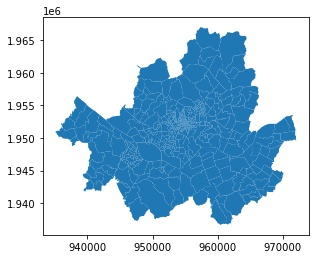

In [6]:
Seoul.plot()

In [9]:
for i in range(len(Seoul)):
    print(Seoul['geometry'].centroid.x.iloc[i], Seoul['geometry'].centroid.y.iloc[i])
    break

948911.9631722016 1951674.8869983854
